# Taller 3 Regresión y Clustering

Este taller es para realizar problemas de Regression y Clasificación 

## Punto 1. Defina un Dataset

Encuentre dos data set a utilizar:
+ Uno para un problema de clasificación
+ Uno para un problema de regression

__Recomendación:__ Utilice los dataset disponisble en la librería scikit-learn http://scikit-learn.org/stable/datasets/

Cada uno escoja un par de dataset diferentes.

In [3]:
#Librerias requeridas para el ejercicio
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
    
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
#Se selecciona la base de datos Boston para realizar el problema de regresión
boston = datasets.load_boston()
#Se selecciona la base de datos Iris para realizar el problema de clasificación
iris = datasets.load_iris()

## Punto 2.1. Regression

Realice una regresión lineal del dataset elegido.

In [5]:
#Descargar la base de datos
boston = datasets.load_boston()
boston.DESCR # Descripcion de la base de datos
boston.keys() #Mirar las claves del diccionario

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [5]:
#convertir la base de datos Boston en un Dataframe de pandas
newboston = pd.DataFrame(boston.data, columns=boston.feature_names)
newboston['PRICE'] = boston.target # Añadir el precio de las casas
newboston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [246]:
#Hacer la regresión lineal multiple, usando para ello el precio de las casas
#Se crea un modelo ajustado con todas las características de la base de datos Boston
lm= smf.ols(formula='PRICE ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT',
                            data=newboston).fit()

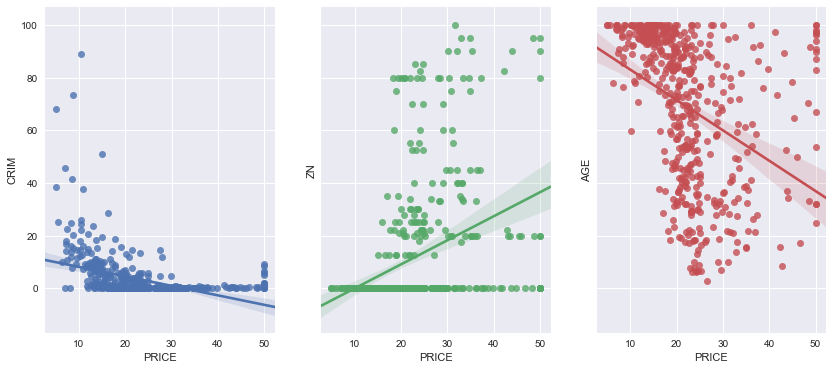

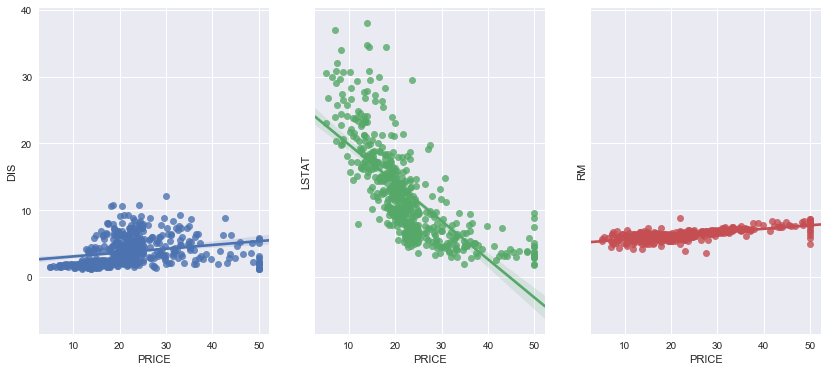

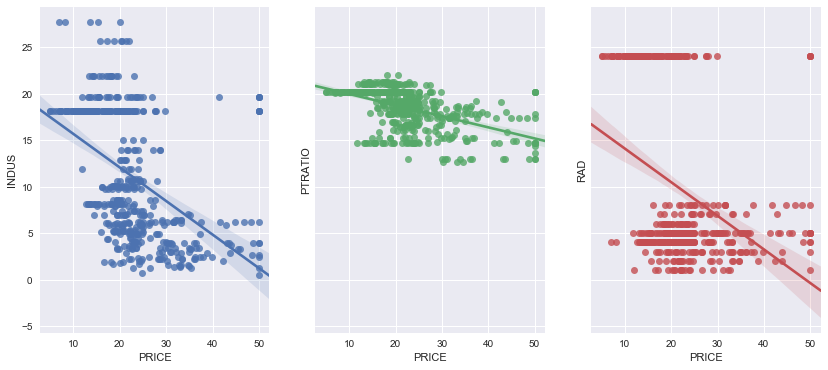

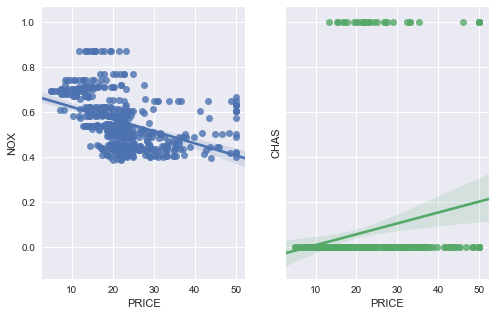

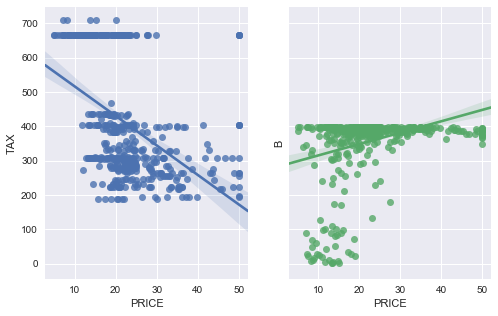

In [224]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, sharey=True, figsize=(14, 6))
sns.regplot(x='PRICE', y='CRIM', ax=ax1, data=newboston)
sns.regplot(x='PRICE', y='ZN', ax=ax2, data=newboston)
sns.regplot(x='PRICE', y='AGE', ax=ax3, data=newboston)

fig, (ax1, ax4, ax5) = plt.subplots(ncols=3, nrows=1, sharey=True, figsize=(14, 6))
sns.regplot(x='PRICE', y='DIS', ax=ax1, data=newboston)
sns.regplot(x='PRICE', y='LSTAT', ax=ax4, data=newboston)
sns.regplot(x='PRICE', y='RM', ax=ax5, data=newboston)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, sharey=True, figsize=(14, 6))
sns.regplot(x='PRICE', y='INDUS', ax=ax1, data=newboston)
sns.regplot(x='PRICE', y='PTRATIO', ax=ax2, data=newboston)
sns.regplot(x='PRICE', y='RAD', ax=ax3, data=newboston)

fig, (ax3, ax4) = plt.subplots(ncols=2, nrows=1, sharey=True, figsize=(8,5))
sns.regplot(x='PRICE', y='NOX', ax=ax3, data=newboston)
sns.regplot(x='PRICE', y='CHAS', ax=ax4, data=newboston)

fig, (ax3, ax4) = plt.subplots(ncols=2, nrows=1, sharey=True, figsize=(8, 5))
sns.regplot(x='PRICE', y='TAX', ax=ax3, data=newboston)
sns.regplot(x='PRICE', y='B', ax=ax4, data=newboston)

## Punto 2.2. Evalúe la calidad de la regressión

Obtenga una medida de la calidad de la regressión (e.g. R2)

In [250]:
#Resumen del modelo ajustado, con parámetros que miden la calidad del modelo
lm.summary()
#El modelo tiene un R^(2) igual a 0.741

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 13 Apr 2017   Prob (F-statistic):          6.95e-135
Time:                        17:15:01   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.000        26.462    46.520
CRIM          -0.1072      0.033     -3.276      0.001        -0.171    -0.043
ZN             0.0464      0.014      3.380      0.001         0.019     0.073
INDUS          0.0209      0.061      0.339      0.735        -0.100     0.142
CHAS           2.6886      0.862      3.120      0.002         0.996     4.381
NOX          -17.7958      3.821     -4.658      0.000       -25.302   -10.289
RM             3.8048      0.418      9.102      0.000         2.983     4.626
AGE            0.0008      0.013      0.057      0.955        -0.025     0.027
DIS           -1.4758      0.199     -7.398      0.000        -1.868    -1.084
RAD            0.3057      0.066      4.608      0.000         0.175     0.436
TAX           -0.0123      0.004     -3.278      0.001        -0.020    -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000        -1.211    -0.696
B              0.0094      0.003      3.500      0.001         0.004     0.015
LSTAT         -0.5255      0.051    -10.366      0.000        -0.625    -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Punto 3.1. Realice una clasificación

Realice una clasificación utilizando una regresión logística

In [2]:
#Descargar la base de datos
iris = datasets.load_iris()
iris.DESCR # Descripcion de la base de datos
iris.keys() #Mirar las claves del diccionario

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [38]:
#Convertir la base de datos Iris en un data frame de pandas
newiris = pd.DataFrame(iris.data, columns=iris.feature_names)
#Descripción de los datos
#newiris.describe()

In [39]:
X = iris.data[:, 2:4]  # tomar las ultimas dos columnas (Características del pétalo)
Y = iris.target #Variable categórica
h = 0.02  
logreg = linear_model.LogisticRegression(C=2).fit(X, Y) #Se crea un modelo ajustado de los datos

## Punto 3.2. Evalúe la clasificación

Obtenga al menos dos medidas del desempeño de la clasificación (e.g. accuracy, recall) 

In [40]:
# Acertividad del modelo 
logreg.score(X, Y)

0.88666666666666671

In [41]:
logreg.coef_

array([[-1.39284547, -2.08971797],
       [ 0.95949065, -1.81779712],
       [ 0.12305336,  3.20378251]])

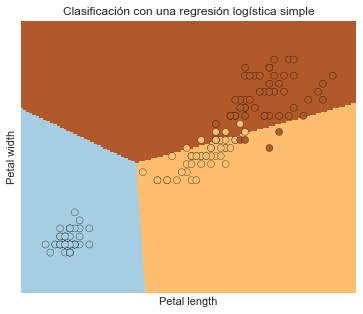

In [42]:
# Representación visual de la precisión del modelo
# Se Trazar el límite de decisión. Para ello, se asigna un color a cada punto en la malla
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Clasificación con una regresión logística simple')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

## Punto 4. Otros algoritmos

Elija otros algoritmos (cada uno algoritmos diferentes), repita los ejercicios 2 y 3 con los algoritmos elegidos y compare el desempeño entre las regresiones lineal (para regresión) y logística (para clasificación).

### Regresión lineal

Se hace una regresión polinomial múltiple, con el fin de comparar el desempeño de ésta con una regresión lineal simple y el algoritmo de clasificación y regresión Gradient Boosting Regression Trees (GBRT).

In [11]:
Y = boston.target #Precio de las casa (Variable dependiente)
X = boston.data # variables independientes
poly = PolynomialFeatures(degree=3) # Se hace una transformación polinómica de las variables independientes
X_ = poly.fit_transform(X)
clf = smf.OLS(Y,X_).fit() #Regresión polinomial múltiple
clf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     27.62
Date:                Sun, 16 Apr 2017   Prob (F-statistic):           2.32e-16
Time:                        22:49:11   Log-Likelihood:                -292.12
No. Observations:                 506   AIC:                             1538.
Df Residuals:                      29   BIC:                             3554.
Df Model:                         476                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       7037.8405   7.88e+04      0.089      0.929     -1.54e+05  1.68e+05
x1           1.91e+04   3.05e+04      0.627      0.535     -4.32e+04  8.14e+04
x2         -1336.3902   1673.918     -0.798      0.431     -4759.936  2087.156
x3         -1.067e+04   4.16e+04     -0.257      0.799     -9.57e+04  7.44e+04
x4            -9.3118     94.332     -0.099      0.922      -202.242   183.619
x5          5620.1558   4.67e+04      0.120      0.905     -8.99e+04  1.01e+05
x6          2663.8393   7366.317      0.362      0.720     -1.24e+04  1.77e+04
x7            83.4712    173.444      0.481      0.634      -271.261   438.203
x8           176.8153   7070.600      0.025      0.980     -1.43e+04  1.46e+04
x9          -981.8248   3.25e+04     -0.030      0.976     -6.74e+04  6.54e+04
x10          -20.7590   1084.221     -0.019      0.985     -2238.240  2196.722
x11         3510.0654    1.2e+04      0.293      0.772      -2.1e+04   2.8e+04
x12         -176.6183    223.721     -0.789      0.436      -634.178   280.942
x13           86.2429    833.440      0.103      0.918     -1618.333  1790.819
x14           90.1454   1090.024      0.083      0.935     -2139.204  2319.495
x15         -528.9581    908.683     -0.582      0.565     -2387.423  1329.507
x16        -1162.4129   1198.573     -0.970      0.340     -3613.770  1288.944
x17            0.3524      1.708      0.206      0.838        -3.140     3.845
x18        -5.574e+04   3.36e+04     -1.657      0.108     -1.25e+05  1.31e+04
x19          -21.7610    453.520     -0.048      0.962      -949.313   905.791
x20           -2.5780     17.128     -0.151      0.881       -37.609    32.453
x21          246.9482    547.544      0.451      0.655      -872.906  1366.802
x22         -718.4517   3418.473     -0.210      0.835     -7710.014  6273.110
x23          109.7318    169.696      0.647      0.523      -237.335   456.798
x24        -1890.5247   2271.783     -0.832      0.412     -6536.843  2755.793
x25           17.8295     74.029      0.241      0.811      -133.577   169.236
x26            2.3161    101.805      0.023      0.982      -205.898   210.530
x27            0.6067     15.043      0.040      0.968       -30.159    31.373
x28          139.7797    204.704      0.683      0.500      -278.888   558.447
x29           -0.1357      1.015     -0.134      0.895        -2.211     1.939
x30        -2019.6397   4287.993     -0.471      0.641     -1.08e+04  6750.291
x31           30.4965    114.540      0.266      0.792      -203.765   264.758
x32           -0.0955      3.517     -0.027      0.979        -7.288     7.097
x33           45.6732    105.768      0.432      0.669      -170.646   261.993
x34           10.6319     98.598      0.108      0.915      -191.024   212.288
x35           -8.4350     12.899     -0.654      0.518       -34.817    17.947
x3

A continuación, se hace una regresión implementando el algoritmo de clasificación y regresión Gradient Boosting Regression Trees (GBRT)

In [9]:
Y = boston.target #Precio de las casa (Variable dependiente)
X = boston.data # variables independientes
clasificacion = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=1, random_state=0, loss='ls').fit(X, Y)
clasificacion.score(X, Y)

0.91021166377615448

A paritr de los análisis de regresión realizados para la base de datos Boston, se puede concluir que la regresión polinomial tuvo el mejor desempeño, seguida por el modelo de clasificación y regresión GBRT, con un R^(2) de 0.998 y 0.910, respectivamente.

### Algoritmo de clasificación

Se implementa el algoritmo de clasificación Gradient Boosting Trees (GBRT), con el fin de comparar el desempeño de éste y una regresión logística.

In [34]:
X = iris.data[:, 2:4]  # Características del pétalo
Y = iris.target #Variable categórica

clasificacion = GradientBoostingClassifier(n_estimators=500, learning_rate=0.05,
                                        max_depth=1, random_state=0).fit(X, Y)
clasificacion.score(X, Y)

0.97333333333333338

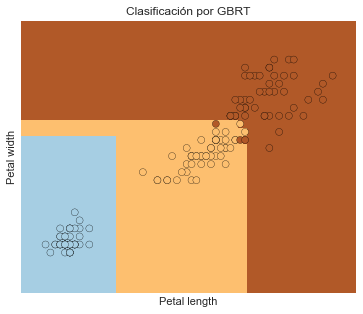

In [33]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clasificacion.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Clasificación por GBRT')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

A paritr de los análisis de clasificación realizados para la base de datos Iris, se puede concluir que con el modelo de clasificación GBRT se tuvo el mejor desempeño, seguida por la regresión logística simple, con un valor de precisión (score) de 0.97 y 0.88, respectivamente.

# Taller 4

Exponer los algorithmos elegidos en el Punto 4 del Taller 3